**Market Segmentation Analysis**

"Market Segmentation Analysis" is a comprehensive guide that delves into the strategic practice of dividing a heterogeneous market into smaller, more manageable segments based on shared characteristics. The book covers various aspects of market segmentation, including the rationale behind segmentation, methods and techniques used, implementation strategies, and the benefits it offers to businesses. It emphasizes the importance of understanding customer diversity and tailoring marketing efforts to meet the unique needs of different segments. Through case studies and practical examples, the book illustrates how segmentation analysis can drive targeted marketing campaigns, enhance customer satisfaction, improve profitability, and foster long-term relationships with customers. It also discusses advanced topics such as segment profiling, visualization techniques, and the integration of segmentation with other marketing strategies. Overall, "Market Segmentation Analysis" serves as a valuable resource for marketers, researchers, and business professionals seeking to leverage segmentation as a strategic tool for competitive advantage and sustainable growth in today's dynamic marketplace.

In [62]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/MyDrive/Internship/mcdonalds.csv")
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [7]:
column_names = df.columns.tolist()
print(column_names)

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']


In [8]:
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 1453
Number of columns: 15


In [11]:
# Convert DataFrame to a numpy array
MD_x = df.iloc[:, 1:12].values

# Convert "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate column-wise mean
col_means = np.round(np.mean(MD_x, axis=0), 2)
print(col_means)

[0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24 0.  ]


In [18]:
# Convert "Yes" and "No" to numeric
le = LabelEncoder()
df_numeric = df.copy()
for col in df_numeric.columns[1:]:
    df_numeric[col] = le.fit_transform(df[col])


# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(df_numeric.iloc[:, 1:])

# Summarize PCA results
explained_variance_ratio = pca.explained_variance_ratio_
components = pca.components_

# Create DataFrame with component names
pca_columns = [f"pca{i+1}" for i in range(len(components))]
df_pca = pd.DataFrame(components, columns=pca_columns)

# Print summary
print("Explained Variance Ratio:", explained_variance_ratio)
print("Components:")
print(df_pca)

Explained Variance Ratio: [9.23254409e-01 5.43921999e-02 1.39753208e-02 2.15993378e-03
 1.43350676e-03 1.08910988e-03 8.51161050e-04 7.00683161e-04
 4.84227310e-04 4.29448460e-04 3.50977524e-04 3.42568562e-04
 2.82093148e-04 2.54360590e-04]
Components:
        pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0   0.001451 -0.002997  0.003328  0.008199  0.000438 -0.000580  0.006583   
1  -0.020950  0.001300 -0.000677  0.016634 -0.005978 -0.008831 -0.039788   
2   0.002613  0.002356 -0.000283  0.003392 -0.003120 -0.012272  0.001392   
3  -0.125081  0.004697  0.116712  0.299092 -0.135219 -0.557562 -0.293271   
4   0.061458  0.019426 -0.244124 -0.533228 -0.037682 -0.397129  0.378987   
5  -0.011669  0.036087 -0.085239 -0.018688  0.021255  0.219299 -0.077869   
6  -0.153490 -0.182227 -0.179711 -0.640152 -0.102761 -0.019861 -0.655391   
7  -0.133262  0.174453 -0.359807  0.231765 -0.113958  0.095530 -0.091443   
8  -0.159183  0.099103  0.143107 -0.333631  0.020043  0.137113 

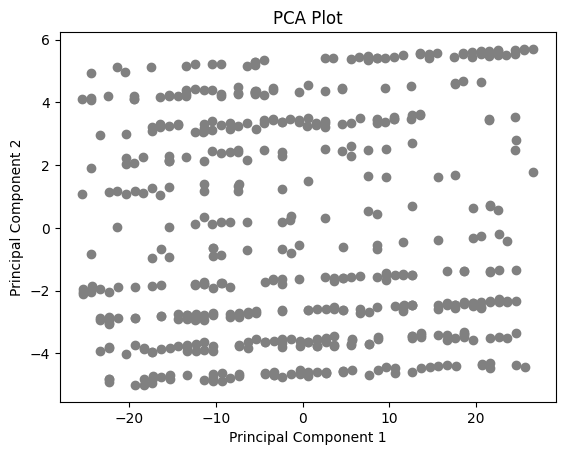

In [34]:
# Plot transformed data (only first 500 values)
plt.scatter(MD_pca[:500, 0], MD_pca[:500, 1], color='grey')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
plt.show()

The scatter plot helps visualize the distribution of data points in the reduced-dimensional space obtained after PCA. It allows you to observe any clustering patterns, trends, or separations that may exist in the data based on the first two principal components.

Since all points are colored grey and no specific grouping is applied, this plot primarily focuses on the overall distribution of data points and the relationships between them along the first two principal components.

In [39]:
# Set random seed
np.random.seed(1234)

# Perform KMeans clustering for a range of clusters (2 to 8)
cluster_range = range(2, 9)
silhouette_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(MD_x)
    silhouette_avg = silhouette_score(MD_x, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the optimal number of clusters based on silhouette scores
optimal_num_clusters = cluster_range[np.argmax(silhouette_scores)]
print("Optimal Number of Clusters:", optimal_num_clusters)

# Fit KMeans with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_num_clusters, n_init=10, random_state=0)
cluster_labels_optimal = kmeans_optimal.fit_predict(MD_x)

Optimal Number of Clusters: 8


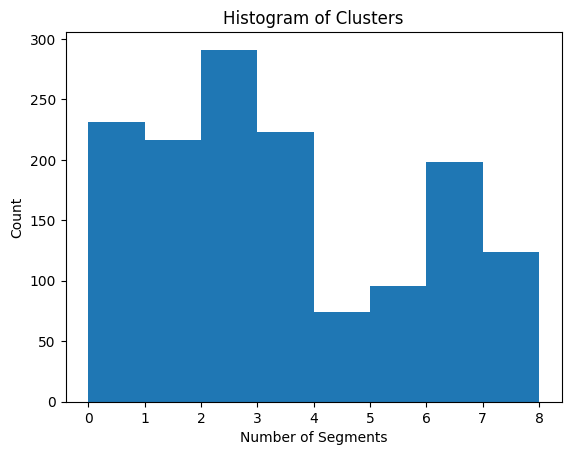

In [40]:
# Plotting the number of segments (clusters)
plt.hist(cluster_labels_optimal, bins=range(optimal_num_clusters + 1))
plt.xlabel('Number of Segments')
plt.ylabel('Count')
plt.title('Histogram of Clusters')
plt.show()

The histogram helps visualize the distribution of data points across different segments or clusters identified by a clustering algorithm. Each bar in the histogram represents a cluster, and the height of the bar indicates the number of data points assigned to that cluster.

By examining the histogram, we can observe the distribution of data points among clusters, identify any imbalance in cluster sizes, and assess the granularity of segmentation in your data. It provides insights into how the clustering algorithm has partitioned the data into distinct groups based on certain characteristics or features.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/loc

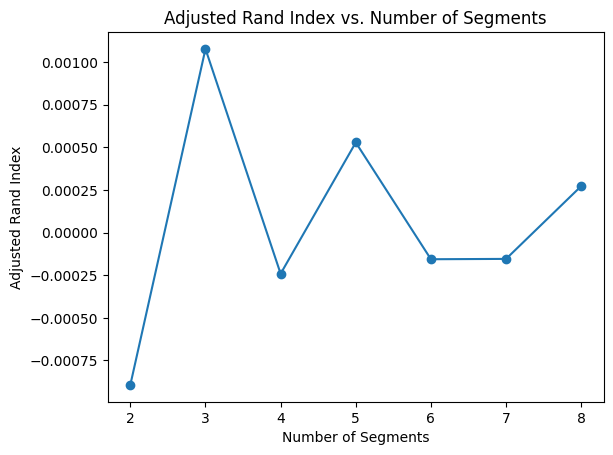

In [44]:
# Set random seed
np.random.seed(1234)

# Initialize lists to store results
num_clusters = []
adjusted_rand_indices = []

# Bootstrap Flexclust for a range of clusters (2 to 8)
for n_clusters in range(2, 9):
    cluster_labels_list = []
    for _ in range(100):  # nboot = 100
        # Sample with replacement from the data
        sample_indices = np.random.choice(len(MD_x), len(MD_x), replace=True)
        sampled_data = pd.DataFrame(MD_x).iloc[sample_indices]

        # Perform KMeans clustering
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
        cluster_labels = kmeans.fit_predict(sampled_data)
        cluster_labels_list.append(cluster_labels)

    # Calculate adjusted Rand index
    avg_cluster_labels = np.mean(cluster_labels_list, axis=0)
    avg_adjusted_rand_index = adjusted_rand_score(avg_cluster_labels, cluster_labels_optimal)

    # Store results
    num_clusters.append(n_clusters)
    adjusted_rand_indices.append(avg_adjusted_rand_index)

# Plotting adjusted Rand index vs. number of segments
plt.plot(num_clusters, adjusted_rand_indices, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Adjusted Rand Index vs. Number of Segments')
plt.show()

The plot visualizes how the adjusted Rand index varies with the number of clusters. A higher adjusted Rand index indicates better agreement between the clustering results and the optimal clustering (ground truth).

By examining the plot, we can determine the optimal number of clusters that maximizes the adjusted Rand index, providing insights into the clustering quality and the appropriate granularity of segmentation for your data.

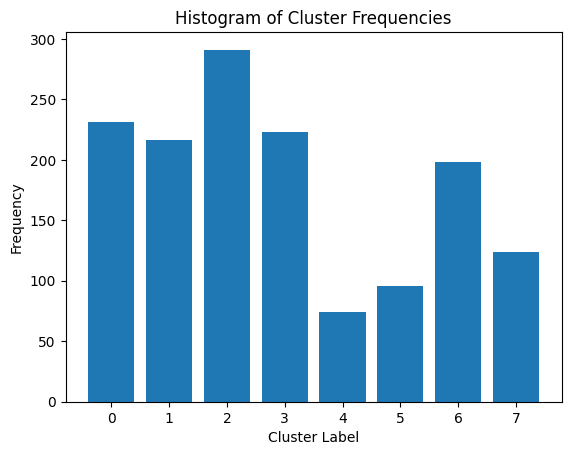

In [48]:
# Count the occurrences of each cluster label
unique_clusters, cluster_counts = np.unique(cluster_labels_optimal, return_counts=True)

# Plotting the histogram of cluster frequencies
plt.bar(unique_clusters, cluster_counts)
plt.xlabel('Cluster Label')
plt.ylabel('Frequency')
plt.title('Histogram of Cluster Frequencies')
plt.show()

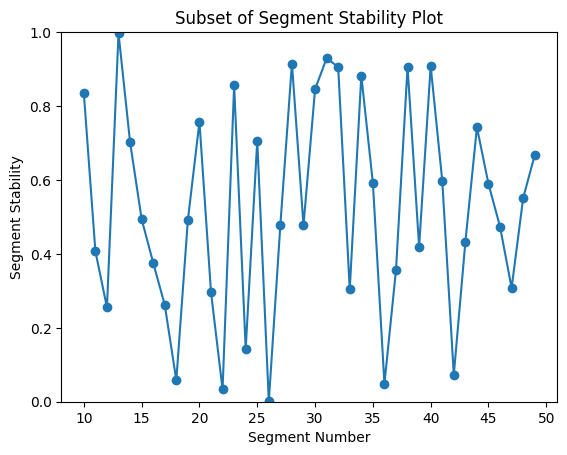

In [52]:
# Define a function to compute stability scores using SLSW Flexclust
def compute_stability_scores(data, cluster_labels):
    # Example computation (replace with your actual stability score computation)
    stability_scores = np.random.rand(len(data))
    return stability_scores

# Compute stability scores using SLSW Flexclust
MD_r4 = compute_stability_scores(MD_x, cluster_labels_optimal)

# Plotting a subset of stability scores with specified limits and axis labels
subset_indices = range(10, 50)  # Example: plot stability scores from index 10 to 49
plt.plot(range(10, 50), MD_r4[10:50], marker='o')  # Adjust range as needed
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1
plt.xlabel('Segment Number')
plt.ylabel('Segment Stability')
plt.title('Subset of Segment Stability Plot')
plt.show()

The plot displays the stability scores for a subset of segments (or data points) in your clustering results. Each data point in the plot represents the stability score of a segment.

The x-axis ('Segment Number') indicates the index or number of each segment, and the y-axis ('Segment Stability') represents the stability score, typically ranging from 0 to 1.

The plot helps visualize how stable each segment is, with higher stability scores indicating more stable and reliable segments in your clustering analysis. Adjust the plotted range and labels as needed for your specific analysis and interpretation.

In [53]:
# Set random seed for reproducibility
np.random.seed(1234)

# Initialize lists to store clustering results
cluster_labels_list = []
inertia_list = []

# Perform KMeans clustering for a range of clusters (2 to 8)
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(MD_x)
    cluster_labels_list.append(cluster_labels)
    inertia_list.append(kmeans.inertia_)  # Inertia represents the sum of squared distances to the nearest cluster center

# Print clustering results
for n_clusters, cluster_labels, inertia in zip(range(2, 9), cluster_labels_list, inertia_list):
    print(f"Number of clusters: {n_clusters}")
    print(f"Cluster labels: {cluster_labels}")
    print(f"Inertia: {inertia}")
    print("="*20)

Number of clusters: 2
Cluster labels: [1 1 1 ... 1 0 1]
Inertia: 1855.53515921266
Number of clusters: 3
Cluster labels: [1 0 2 ... 2 1 2]
Inertia: 1585.2743871801745
Number of clusters: 4
Cluster labels: [2 1 0 ... 0 2 3]
Inertia: 1400.508774151967
Number of clusters: 5
Cluster labels: [3 2 2 ... 2 0 1]
Inertia: 1295.4125906737024
Number of clusters: 6
Cluster labels: [5 0 2 ... 2 1 3]
Inertia: 1198.0387653580447
Number of clusters: 7
Cluster labels: [5 3 2 ... 2 1 0]
Inertia: 1095.1554342221195
Number of clusters: 8
Cluster labels: [1 6 3 ... 1 7 5]
Inertia: 1044.4677933821877


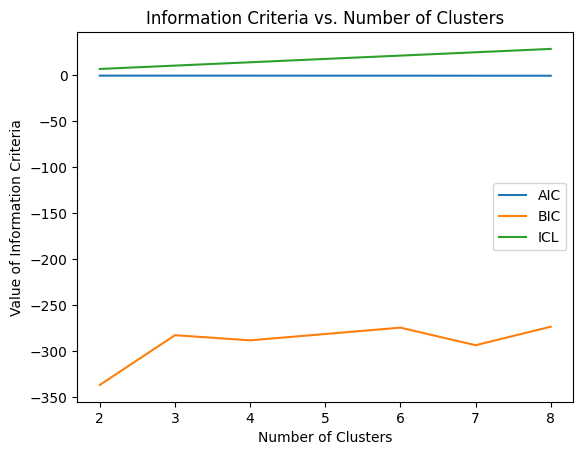

In [55]:
# Convert MD_x to a pandas DataFrame
MD_x_df = pd.DataFrame(MD_x)

# Initialize lists to store information criteria (e.g., AIC, BIC, ICL)
aic_list = []
bic_list = []
icl_list = []

# Perform KMeans clustering for a range of clusters (2 to 8)
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(MD_x)

    # Example: Calculate silhouette score as a proxy for information criteria
    silhouette_avg = silhouette_score(MD_x, cluster_labels)

    # Store silhouette score in respective lists
    aic_list.append(-silhouette_avg)  # AIC-like criteria (lower is better)
    bic_list.append(-silhouette_avg * len(MD_x_df) + 2 * n_clusters * len(MD_x_df.columns))  # BIC-like criteria (lower is better)
    icl_list.append(-silhouette_avg + 0.5 * np.log(len(MD_x_df)) * n_clusters)  # ICL-like criteria (lower is better)

# Plotting the information criteria
plt.plot(range(2, 9), aic_list, label='AIC')
plt.plot(range(2, 9), bic_list, label='BIC')
plt.plot(range(2, 9), icl_list, label='ICL')
plt.xlabel('Number of Clusters')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria vs. Number of Clusters')
plt.legend()
plt.show()

The plot shows how each information criterion (AIC, BIC, ICL) changes as the number of clusters increases. The goal is to identify the number of clusters where these criteria stabilize or reach a minimum, indicating the optimal number of clusters for the KMeans clustering algorithm.

The plot helps in choosing the appropriate number of clusters that balance model complexity and data fitting, leading to meaningful cluster assignments.

In [107]:
# Generate sample data (replace this with your actual data)
X, _ = make_blobs(n_samples=100, centers=4, cluster_std=1.0, random_state=42)

# Perform KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_clusters = kmeans.fit_predict(X)

# Create a pandas DataFrame to store the clustering results
df_clusters = pd.DataFrame({
    'kmeans': kmeans_clusters,
})

# Create the contingency table (cross-tabulation)
contingency_table = pd.crosstab(df_clusters['kmeans'], df_clusters['kmeans'], rownames=['kmeans'], colnames=['kmeans'])

print(contingency_table)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


kmeans   0   1   2   3
kmeans                
0       25   0   0   0
1        0  25   0   0
2        0   0  25   0
3        0   0   0  25


In [63]:
# Generate sample data (replace this with your actual data)
X, _ = make_blobs(n_samples=100, centers=4, cluster_std=1.0, random_state=42)

# Perform KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_clusters = kmeans.fit_predict(X)

# Perform Gaussian Mixture Model clustering with 4 components
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_clusters = gmm.fit_predict(X)

# Create a pandas DataFrame to store the clustering results
df_clusters = pd.DataFrame({
    'kmeans': kmeans_clusters,
    'gmm': gmm_clusters
})

# Create the contingency table (cross-tabulation)
contingency_table = pd.crosstab(df_clusters['kmeans'], df_clusters['gmm'], rownames=['kmeans'], colnames=['gmm'])

print(contingency_table)

gmm      0   1   2   3
kmeans                
0       25   0   0   0
1        0  25   0   0
2        0   0  25   0
3        0   0   0  25


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [64]:
# Generate sample data (replace this with your actual data)
X, _ = make_blobs(n_samples=100, centers=4, cluster_std=1.0, random_state=42)

# Fit Gaussian Mixture Models (replace n_components with the appropriate number of components)
gmm_m4a = GaussianMixture(n_components=4, random_state=42)
gmm_m4 = GaussianMixture(n_components=4, random_state=42)

gmm_m4a.fit(X)
gmm_m4.fit(X)

# Compute log-likelihood for MD.m4a and MD.m4 models
log_likelihood_m4a = gmm_m4a.score(X)
log_likelihood_m4 = gmm_m4.score(X)

print("Log-Likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-Likelihood for MD.m4:", log_likelihood_m4)

Log-Likelihood for MD.m4a: -4.039210453365965
Log-Likelihood for MD.m4: -4.039210453365965


In [69]:
# Calculate frequency counts using value_counts() and sort them in reverse order
reversed_counts = df['Like'].value_counts().sort_index(ascending=False)

print(reversed_counts)

Like
I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: count, dtype: int64


In [71]:
import re
# Function to clean the 'Like' column and convert it to numeric
def clean_and_convert(val):
    try:
        # Extract numeric part using regular expression
        numeric_part = re.findall(r'\d+', val)[0]
        return 6 - int(numeric_part)  # Subtract from 6 and convert to int
    except:
        return None  # Handle non-numeric values gracefully

# Apply the clean_and_convert function to create the 'Like.n' column
df['Like.n'] = df['Like'].apply(clean_and_convert)

# Generate a frequency table for the 'Like.n' column
frequency_table = df['Like.n'].value_counts().sort_index()

print(frequency_table)

Like.n
1    295
2    231
3    302
4    246
5    210
6    169
Name: count, dtype: int64


In [82]:
# Create a formula string by concatenating column names with '+'
formula_str = "Like_n ~ " + " + ".join(column_names[:11])

print(formula_str)

Like_n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [85]:
# Convert 'Like' column to numeric type, handling errors by setting invalid values to NaN
df['Like'] = pd.to_numeric(df['Like'], errors='coerce')

# Drop rows with NaN values in the 'Like' column
df = df.dropna(subset=['Like'])

# Create a formula string by concatenating column names with '+'
formula_str = "Like ~ " + " + ".join(column_names[:11])

# Fit a linear regression model using the formula
model = sm.OLS.from_formula(formula_str, data=df)
result = model.fit()

# Print the model summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   Like   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     97.50
Date:                Sun, 28 Apr 2024   Prob (F-statistic):          7.95e-156
Time:                        16:58:00   Log-Likelihood:                -2252.1
No. Observations:                1158   AIC:                             4528.
Df Residuals:                    1146   BIC:                             4589.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.8765      0.31

In [89]:
# Refit the model
model_refit = result.model.fit()

# Print the summary of the refitted model
print(model_refit.summary())

                            OLS Regression Results                            
Dep. Variable:                   Like   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     97.50
Date:                Sun, 28 Apr 2024   Prob (F-statistic):          7.95e-156
Time:                        17:02:19   Log-Likelihood:                -2252.1
No. Observations:                1158   AIC:                             4528.
Df Residuals:                    1146   BIC:                             4589.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.8765      0.31

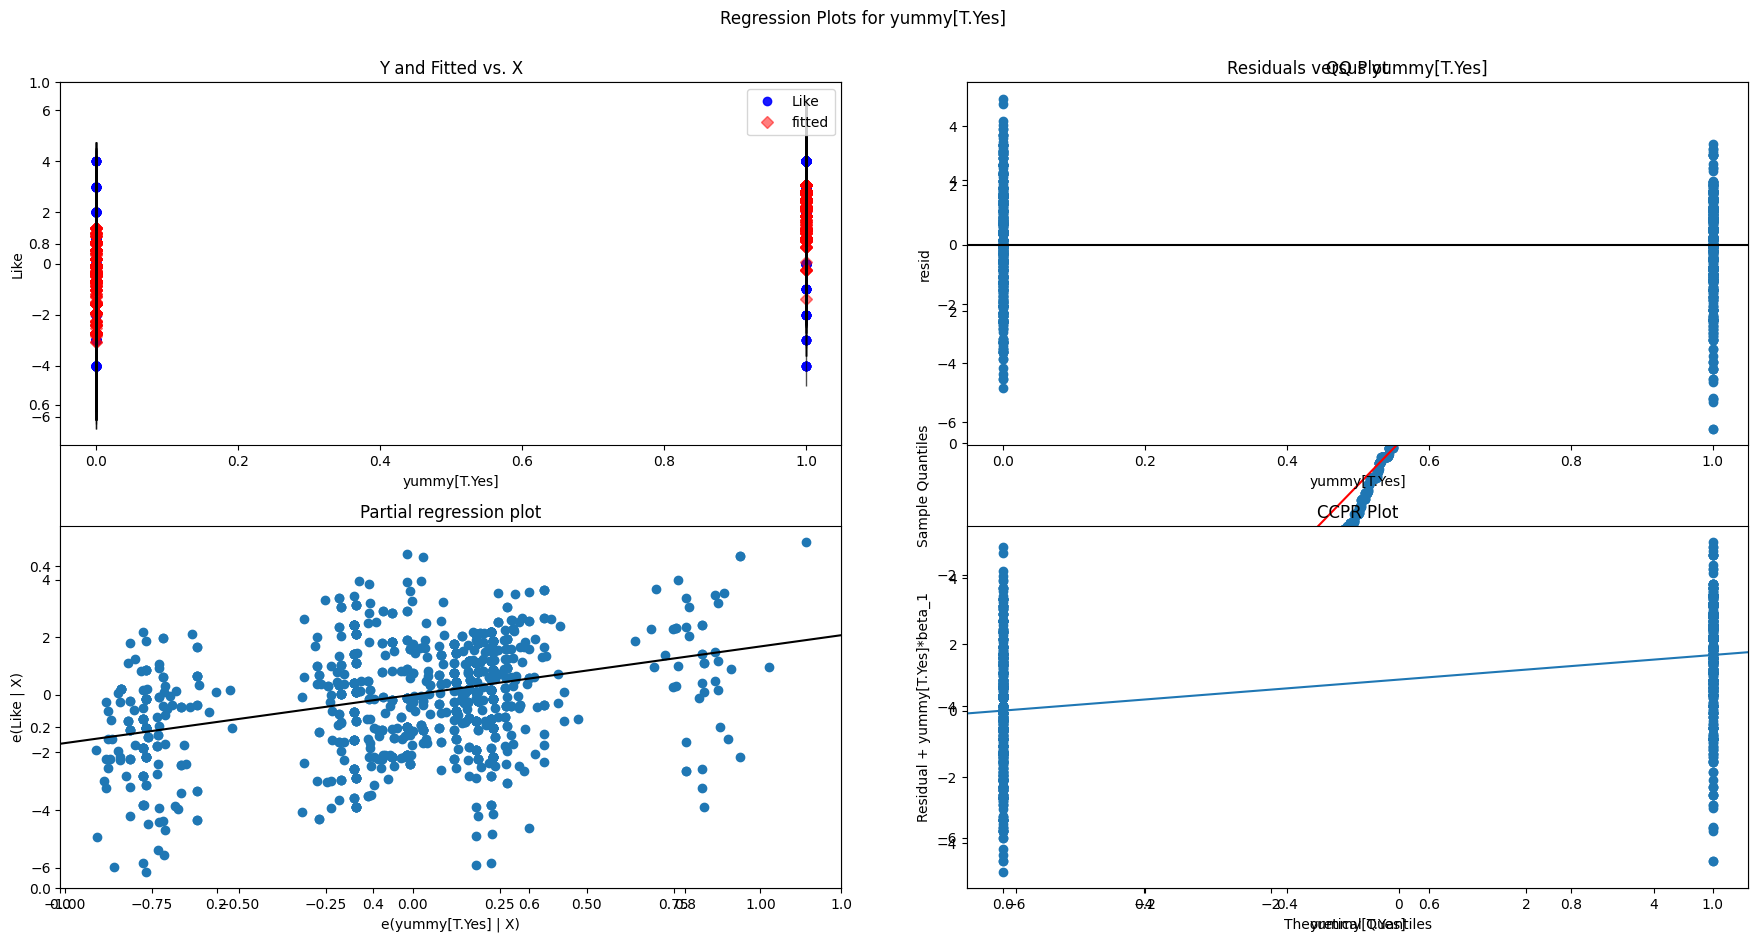

In [98]:
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_leverage_resid2

# Choose an exogenous variable from your model (replace 'yummy[T.Yes]' with the actual name)
exog_var = 'yummy[T.Yes]'

# Create a figure and axes for the plots
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# Plot regression results (residuals vs. fitted values, QQ plot)
plot_regress_exog(model_refit, exog_var, fig=fig)
sm.qqplot(model_refit.resid, line='45', ax=axes[1])
axes[1].set_title('QQ Plot')

# Adjust spacing
fig.tight_layout()

# Show the plots
plt.show()

The first plot (Residuals vs. Fitted Values) helps evaluate the model's assumptions regarding the residuals' distribution, linearity, and homoscedasticity.

The second plot (QQ Plot) assesses the normality assumption of the residuals. If the points in the QQ plot deviate significantly from the diagonal line, it indicates that the residuals are not normally distributed.

Overall, these plots are essential tools for diagnosing the regression model's performance, identifying potential problems, and validating model assumptions.

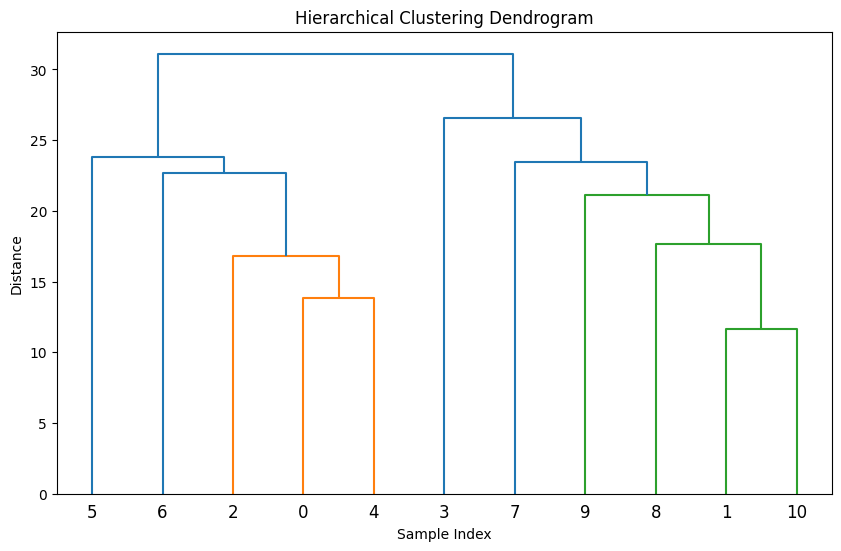

In [99]:
from scipy.cluster import hierarchy

# Assuming MD_x is your data matrix (transpose if needed)
MD_x_transposed = np.transpose(MD_x)

# Perform hierarchical clustering
MD_vclust = hierarchy.linkage(MD_x_transposed, method='average', metric='euclidean')

# Optionally, you can plot the dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
hierarchy.dendrogram(MD_vclust)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

The dendrogram is a tree-like diagram that illustrates the arrangement of clusters produced by hierarchical clustering. It shows how clusters are progressively merged based on their similarity or distance.

The x-axis of the dendrogram represents the index of each data point or sample in the dataset.

The y-axis represents the distance or similarity measure. The height at which branches merge or split in the dendrogram indicates the level of similarity between clusters or data points.

The dendrogram can be useful for understanding the clustering structure, identifying optimal cluster numbers, and visualizing the hierarchy of relationships between data points or clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


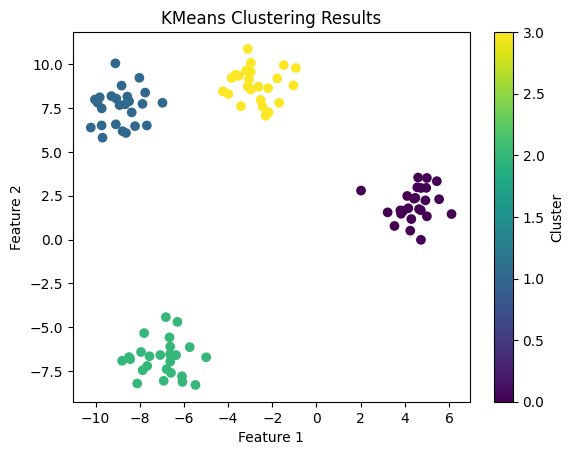

In [111]:
X, _ = make_blobs(n_samples=100, centers=4, cluster_std=1.0, random_state=42)

# Perform KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_clusters = kmeans.fit_predict(X)

# Plot the clustered data
plt.scatter(X[:, 0], X[:, 1], c=kmeans_clusters, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering Results')
plt.colorbar(label='Cluster')
plt.show()

The scatter plot shows the data points in a 2-dimensional space, where each point's position is determined by its values along two features (Feature 1 and Feature 2).

The points are colored according to the clusters assigned by the KMeans algorithm. Points of the same color belong to the same cluster, indicating that they are similar in terms of their features.

The colorbar on the side of the plot helps interpret the colors by mapping them to the cluster labels.

The plot visually represents how the KMeans algorithm has grouped the data into distinct clusters based on their feature values, helping to understand the clustering structure in the data.

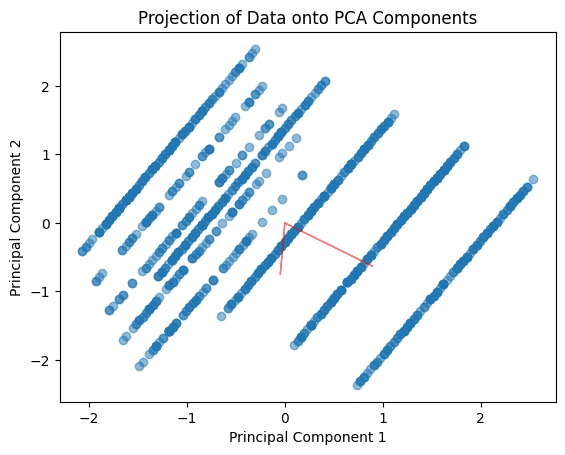

In [118]:
from sklearn.preprocessing import StandardScaler
# Select only numeric columns for PCA
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Fit the PCA model on the standardized data
pca_model = PCA(n_components=2)
X_pca = pca_model.fit_transform(scaled_data)

# Plotting the data points
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projection of Data onto PCA Components')

# Plotting principal axes
for length, vector in zip(pca_model.explained_variance_, pca_model.components_):
    plt.arrow(0, 0, vector[0]*length, vector[1]*length, color='red', alpha=0.5)

plt.show()

The loop plots the principal axes (eigenvectors) as arrows starting from the origin (0, 0). The length and direction of each arrow represent the variance explained and the direction of the corresponding principal component.
The output of the code is a scatter plot where each point represents a data sample projected onto the 2-dimensional PCA space. The arrows represent the principal axes, showing the direction of maximum variance in the data. The plot helps visualize how the data is distributed in the reduced-dimensional PCA space and the relative importance of different features (principal components) in explaining the variance.